In [1]:
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np

In [2]:
games = pd.read_csv('video-games.csv', encoding='utf-8')

In [3]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [43]:
# Estrutura do DataFrame

publishers = list(games['Publisher'].unique())
majorPublishers = publishers[:20]
otherPublishers = publishers[20:]
dictSalesByPublisher = {}

for pub in majorPublishers:
    dictSalesByPublisher.update([(pub, 0)])

In [44]:
# Função para obter os índices dos valores que foram 
# passados como parâmetro, retornando o índice e a coluna
# a qual o valor pertence

def getIndexes(dfObj, value): 
    listOfPositions = []
    result = dfObj.isin([value])
    seriesResult = result.any()
    columnNames = list(seriesResult[seriesResult == True].index)
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPositions.append((row, col))
    return listOfPositions

In [45]:
for pub in majorPublishers:
    amount = 0
    indexes = getIndexes(games, pub)
    for index in indexes:
        amount += games['Global_Sales'][index[0]]
    dictSalesByPublisher.update([(pub, amount)])

In [46]:
dictSalesByPublisher.update([('Others', 0)])

In [47]:
amount = 0
for pub in otherPublishers:
    indexes = getIndexes(games, pub)
    for index in indexes:
        amount += games['Global_Sales'][index[0]]
dictSalesByPublisher.update([('Others', amount)])

In [48]:
salesByPublisher = pd.DataFrame(dictSalesByPublisher.items(), columns=['Publisher', 'GlobalSales'])

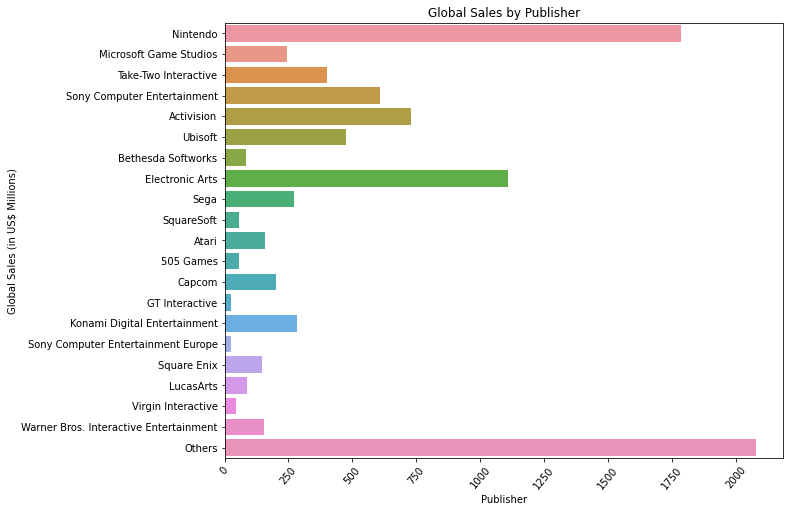

In [50]:
fig, ax = plt.subplots(figsize=(10,8))
plot = sea.barplot(y=salesByPublisher['Publisher'], x=salesByPublisher['GlobalSales'], ax=ax)
ax.set_title('Global Sales by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (in US$ Millions)')
plt.xticks(rotation=50)
plt.show()